# Features Discussion and Dummy Classifier Baseline

## Table of Contents

- [Data Takeover](#Data-Takeover)
    - [Train/Test Split](#Train/Test-Split)
- [DecisionTree Classifier](#DecisionTree-Classifier)
    - [Performance Measurement](#Performance-Measurement)
- [Results Handover](#Results-Handover)

## Data Takeover

Read in DataFrame from chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) as input for processing in this chapter.

In [1]:
import os
import pandas as pd

path_goldstandard = './daten_goldstandard'

# Restore results so far
df_labelled_feature_matrix = pd.read_pickle(os.path.join(path_goldstandard,
                                                         'labelled_feature_matrix.pkl'),
                                 compression=None)

df_labelled_feature_matrix.head()

,duplicates,century_delta,corporate_110_delta,corporate_710_delta,edition_delta,format_prefix_delta,format_postfix_delta,person_245c_delta,ttlfull_245_delta,ttlfull_246_delta,volumes_delta
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,0.818905,0.363636,1.0,1.0
2,1,1.0,1.0,1.0,1.0,1.0,1.0,0.697740,1.000000,1.0,1.0
3,1,1.0,1.0,1.0,1.0,1.0,1.0,0.818905,0.363636,1.0,1.0
4,1,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0


In [2]:
print('Part of duplicates (1) on uniques (2) in units of [%]')
print(df_labelled_feature_matrix.duplicates.value_counts(normalize=True)*100)

Part of duplicates (1) on uniques (2) in units of [%]
0    99.435054
1     0.564946
Name: duplicates, dtype: float64


## Features Discussion

By now, the features have become purely numerical values. In this section, the features of the feature matrix will be analysed and discussed deeper.

### century_delta

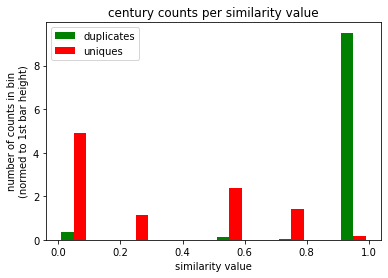

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist([df_labelled_feature_matrix.century_delta[df_labelled_feature_matrix.duplicates==1],
          df_labelled_feature_matrix.century_delta[df_labelled_feature_matrix.duplicates==0]],
         density=True, align='mid', color=['green', 'red'],
         label=['duplicates', 'uniques'])
plt.title('century counts per similarity value')
plt.xlabel('similarity value')
plt.ylabel('number of counts in bin\n(normed to 1st bar height)')
plt.legend()
plt.show()

### corporate

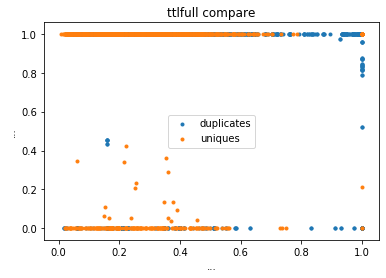

In [4]:
no_unique_samples = 1000
idx_duplicates = list(df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==1].index)
idx_uniques = list(df_labelled_feature_matrix[df_labelled_feature_matrix.duplicates==0].index)

plt.scatter(df_labelled_feature_matrix.loc[idx_duplicates].ttlfull_245_delta,
          df_labelled_feature_matrix.loc[idx_duplicates].ttlfull_246_delta,
        label='duplicates', marker='.')
plt.scatter(df_labelled_feature_matrix.loc[idx_uniques].ttlfull_245_delta.sample(n=no_unique_samples),
          df_labelled_feature_matrix.loc[idx_uniques].ttlfull_246_delta.sample(n=no_unique_samples),
        label='uniques', marker='.')

plt.title('ttlfull compare')
plt.xlabel('...')
plt.ylabel('...')
plt.legend()
plt.show()

## DecisionTree Classifier

### Train/Test Split

The train/test split will be implemented here as a general function to be called in the models chapters.

In [5]:
X = df_labelled_feature_matrix.drop(columns=['duplicates']).values
y = df_labelled_feature_matrix.duplicates.values

In [6]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

X_tr[:5], y_tr[:5]

(array([[0.5       , 1.        , 1.        , 1.        , 0.        ,
         0.42857143, 0.50165426, 0.44444444, 1.        , 0.07142857],
        [0.        , 1.        , 0.        , 1.        , 0.        ,
         0.42857143, 0.54435379, 0.109375  , 1.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 1.        ,
         1.        , 0.6020276 , 0.38028169, 1.        , 0.22222222],
        [0.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 0.        , 0.17910448, 1.        , 0.375     ],
        [0.75      , 1.        , 1.        , 0.        , 1.        ,
         1.        , 0.51341896, 0.05479452, 1.        , 0.2       ]]),
 array([0, 0, 0, 0, 0]))

In [7]:
print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)

(208586, 10) (208586,) (52147, 10) (52147,)


### Classifier Fit and Prediction

In [8]:
from sklearn.dummy import DummyClassifier

du = DummyClassifier(strategy='stratified', random_state=0)
du.fit(X_tr, y_tr)
y_pred = du.predict(X_te)

### Performance Measurement

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_te, y_pred)

array([[51571,   281],
       [  294,     1]])

In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print('Score {:.1f}%'.format(100*du.score(X_te, y_te)))
print('Area under the curve {:.1f}% - accuracy {:.1f}% - precision {:.1f}% - recall {:.1f}%'.format(
    100*roc_auc_score(y_te, y_pred),
                100*accuracy_score(y_te, y_pred),
                100*precision_score(y_te, y_pred),
                100*recall_score(y_te, y_pred)
               ))

Score 98.9%
Area under the curve 49.9% - accuracy 98.9% - precision 0.4% - recall 0.3%


## Results Handover

Entry point for saving results.

In [11]:
# Add result of this section
df_result = pd.DataFrame.from_dict({
    'model': ['Dummy Classifier'],
    'test_score' : [du.score(X_te, y_te)],
    'auc' : [100*roc_auc_score(y_te, y_pred)],
    'accuracy' : [100*accuracy_score(y_te, y_pred)],
    'precision' : [100*precision_score(y_te, y_pred)],
    'recall' : [100*recall_score(y_te, y_pred)]
})

# Save full DataFrame into pickle file
df_result.to_pickle(os.path.join(path_goldstandard,
                                 'results.pkl'), compression=None)